In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
raw_data_path = Path("../data/raw/dataset.csv")
df_full = pd.read_csv(raw_data_path, nrows=0)
print(df_full.columns.tolist())

['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album', 'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature', 'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine', 'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1', 'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2', 'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3']


In [3]:
df = pd.read_csv(raw_data_path, usecols=["Artist(s)", "song", "text", "emotion"])
print("Dimension before cleaning:", df.shape)
df.head(5)

Dimension before cleaning: (551443, 4)


,Artist(s),song,text,emotion
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,sadness
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",sadness
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",joy
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,joy
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,joy


In [4]:
def clean_lyrics(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)        # remove [Verse], [Chorus], etc.
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"[^a-zA-Z\s']", "", text)   # keep letters, spaces, apostrophes
    text = re.sub(r"\s+", " ", text)           # replace multiple spaces with single
    return text.strip()                        # trim leading/trailing spaces

In [5]:
df_cleaned = df.copy()
df_cleaned["clean_text"] = df_cleaned["text"].apply(clean_lyrics)

# Remove lines with NaN values
df_cleaned.dropna(subset=["song", "clean_text", "emotion"], inplace=True)

# Remove lines with short text
df_cleaned = df_cleaned[df_cleaned["clean_text"].str.len() > 10]

In [6]:
# Remove emotions that appear fewer than 100 times
min_count = 100
valid_emotions = df_cleaned["emotion"].value_counts()
valid_emotions = valid_emotions[valid_emotions >= min_count].index
df_cleaned = df_cleaned[df_cleaned["emotion"].isin(valid_emotions)]

print("After cleaning:", df_cleaned.shape)

After cleaning: (551398, 5)


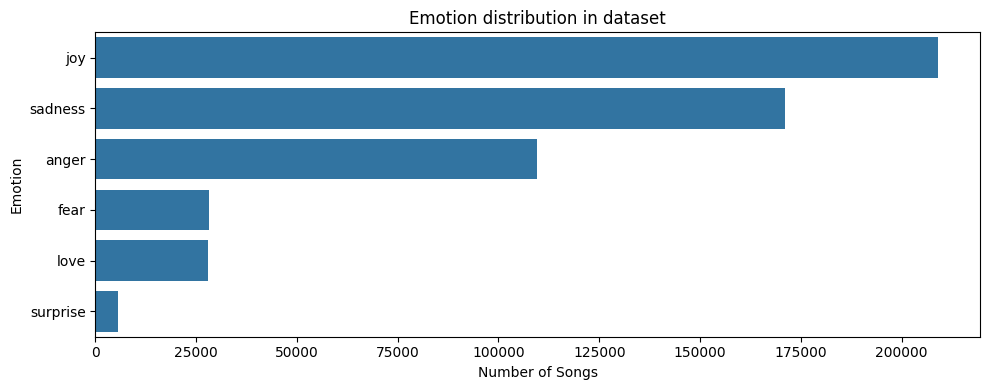

In [7]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_cleaned, y="emotion", order=df_cleaned["emotion"].value_counts().index)
plt.title("Emotion distribution in dataset")
plt.xlabel("Number of Songs")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()

In [8]:
df_cleaned[["song", "text", "clean_text", "emotion"]].head(10)

,song,text,clean_text,emotion
0,Even When the Waters Cold,Friends told her she was better off at the bot...,friends told her she was better off at the bot...,sadness
1,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",well i heard it playing soft from a drunken ba...,sadness
2,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",oh my god did i just say that out loud should'...,joy
3,Ooo,[Verse 1] Remember when I called you on the te...,remember when i called you on the telephone yo...,joy
4,Freedom 15,[Verse 1] Calling me like I got something to s...,calling me like i got something to say you tho...,joy
5,All U Writers,All you writers Get out your pens and write Al...,all you writers get out your pens and write al...,love
6,Serbia Drums,[Verse 1] We've known working in obscurity and...,we've known working in obscurity and we'll kno...,sadness
7,Must Be the Moon,"One drink, two drinks, three drinks, four She ...",one drink two drinks three drinks four she had...,joy
8,Slyd,"No, that's weird Slyd, slyd, slyd, you like t...",no that's weird slyd slyd slyd you like the in...,surprise
9,Hello? Is This Thing On?,Sometimes you don't say nothing 'cause you got...,sometimes you don't say nothing 'cause you got...,sadness


In [9]:
df_model = df_cleaned[["song", "clean_text", "emotion"]].copy()
df_model.rename(columns={"clean_text": "text"}, inplace=True)
df_model.to_csv("../data/processed/preprocessed_lyrics.csv", index=False)